**Import Packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                            f1_score,\
                            classification_report,\
                            roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

**Read the preprocssed data**

In [4]:
data=pd.read_csv("Preprocessed_data.csv")
data

,Unnamed: 0,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,0,37,1,0,34.827662,-118.999073,2,9,5,42.39,0,0,16.0,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,1,46,0,0,34.162515,-118.203869,0,9,5,10.69,1,0,10.0,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,2,1,50,0,0,33.645672,-117.922613,0,4,4,33.65,0,2,30.0,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,3,1,78,1,0,38.014457,-122.115432,1,13,3,27.82,0,2,4.0,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,4,0,75,1,0,34.227846,-119.079903,3,3,5,7.38,0,2,11.0,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,7036,0,53,0,0,36.807595,-118.901544,0,1,4,42.09,0,2,9.0,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,7038,0,20,0,0,32.759327,-116.997260,0,13,3,46.68,0,1,59.0,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,7039,1,40,1,0,37.734971,-120.954271,1,22,3,16.20,1,2,17.0,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,7040,1,22,0,0,39.108252,-123.645121,0,2,4,18.62,0,1,51.0,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


$Step-1$:

**Divide data into input and target data**

In [5]:
# Here the target column is Customer Status
X = data.drop('Customer Status', axis=1)
y = data['Customer Status']

In [6]:
X.shape, y.shape

((4835, 31), (4835,))

$Step-2$:
    
**Train-Test-Split**

In [7]:
# test size=0.2 , train data 80% and test data 20%
# random state=0 will split the data randomly

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(3868, 31)
(967, 31)
(3868,)
(967,)


$Step-3$:
    
**Removing the outliers using z-score**

In [8]:
from scipy import stats # All statistics related

# Define the columns for which you want to remove outliers
selected_columns = ['Number of Dependents', 'Avg Monthly GB Download', 'Total Refunds',
                    'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [9]:
X_train.head()

,Unnamed: 0,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
3739,5439,1,71,1,0,33.902211,-117.914922,0,21,5,22.30,0,2,9.0,0,0,1,0,1,0,0,1,0,0,0,86.55,1857.25,0.0,0,468.30,2325.55
1551,2263,1,21,0,0,37.587494,-121.862856,0,2,5,23.52,0,1,48.0,0,0,0,1,1,1,1,1,0,0,0,-8.00,132.40,0.0,0,47.04,179.44
1389,2042,0,45,0,3,34.255203,-117.175654,0,18,3,42.45,1,1,28.0,1,0,0,0,0,1,1,1,0,0,0,64.80,1166.70,0.0,0,764.10,1930.80
2947,4283,1,33,0,0,32.957195,-117.202542,0,30,5,30.06,0,2,19.0,0,0,0,0,1,1,1,1,0,1,0,90.25,2755.35,0.0,0,901.80,3657.15
2620,3818,1,26,0,0,37.249377,-120.249581,0,37,2,38.72,1,2,59.0,0,1,0,1,1,1,1,1,1,1,1,104.50,3778.00,0.0,0,1432.64,5210.64


## With out hyperparameter tuning

- Decision Tree

- KNN

- Naive Bayes

- Logistic regression

- Random forest

In [10]:
# We are not providing any parameters
# We are using the default parameters

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred_dt=dtree.predict(X_test)
print(y_pred_dt[:10])
print(y_test.values[:10])

[0 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 1 1 0 1 1]


In [13]:
accuracy_score(y_test,y_pred_dt)

0.7476732161323681

In [14]:
confusion_matrix(y_test,y_pred_dt)

array([[193, 112],
       [132, 530]], dtype=int64)

In [15]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred_dt).ravel()
# TP=205  TN=507  FP=155  FN=100
print(tn,fp,fn,tp)

acc=(tn+tp)/(tn+tp+fp+fn)
print(acc)
pr=tp/(tp+fp)
print(pr)
rc=tp/(tp+fn)
print(rc)
f1=(2*pr*rc)/(pr+rc)
print(f1)

193 112 132 530
0.7476732161323681
0.8255451713395638
0.8006042296072508
0.8128834355828221


In [16]:
acc=accuracy_score(y_test,y_pred_dt)
pr=precision_score(y_test,y_pred_dt) (spam email )
rc=recall_score(y_test,y_pred_dt)
f1=f1_score(y_test,y_pred_dt)
print(round(acc,2))
print(round(pr,2))
print(round(rc,2))
print(round(f1,3))

0.75
0.83
0.8
0.813


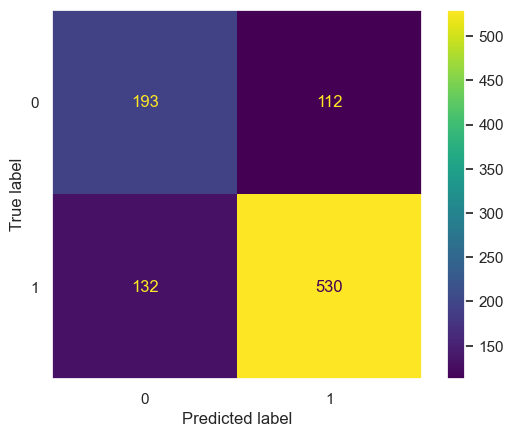

In [17]:
cmt=confusion_matrix(y_test,y_pred_dt)
ConfusionMatrixDisplay(cmt).plot()
plt.grid(False)

$Roc$-$AUC$

- X-axis: fpr
    
- y-axis: tpr
    
- Roc-Auc curve use the probabilities not predictions

- we know that before getting the output, will get probabilities

- accuracy , precision, recall,f1score will compare y_test with y_prediction

- ROC AUC will compare y_test, y_predicted class-1 probabilites 

- y_score : probability

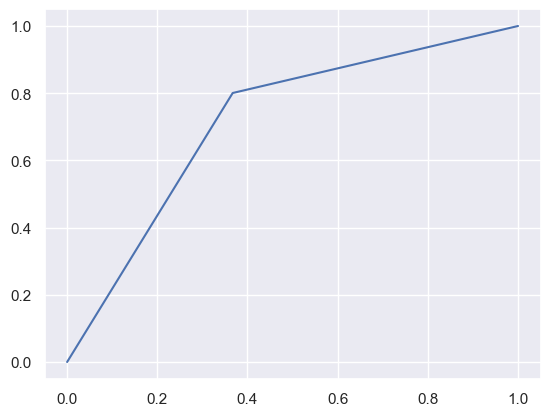

In [18]:
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]
# X_test first sample ====== > 1 or 0

# c-0 c-1

#[0., 1.], ==== > 1
#[0., 1.], ==== > 1
#[1., 0.], ==== > 0 
#[1., 0.] ===== > 0

fpr, tpr, thresholds=roc_curve(y_test,y_dt_pred_prob)
plt.plot(fpr,tpr)

In [19]:
y_pred_dt[:15]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

### Decision Tree

accuray is: 76.11
F1 is: 0.82
Precision is: 0.83
Recall is: 0.81
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       305
           1       0.83      0.81      0.82       662

    accuracy                           0.76       967
   macro avg       0.72      0.73      0.73       967
weighted avg       0.76      0.76      0.76       967



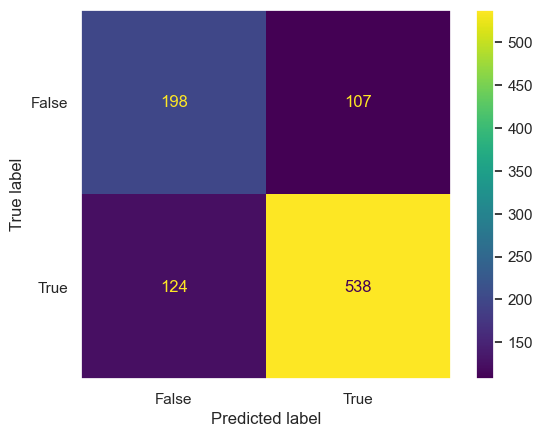

True negative: 198
False postive: 107
False negative: 124
True postive: 538


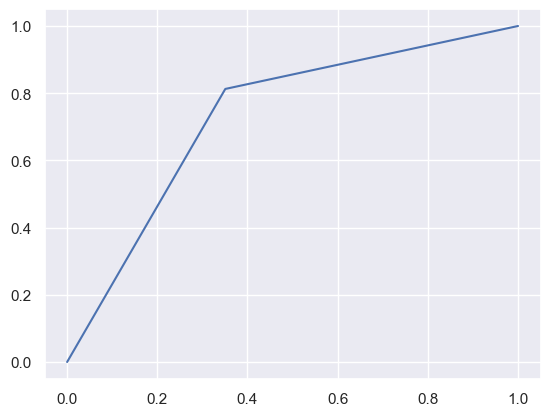

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_dt=dtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

# ================================Step-7:Confusion matrix=========================================================================

cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

### Logistic Regression

c:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuray is: 76.84
F1 is: 0.84
Precision is: 0.81
Recall is: 0.86


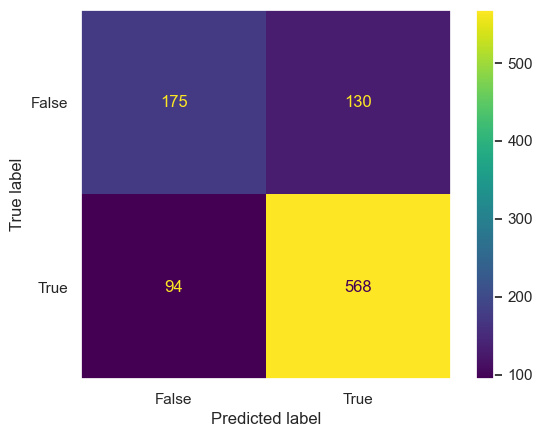

True negative: 175
False postive: 130
False negative: 94
True postive: 568


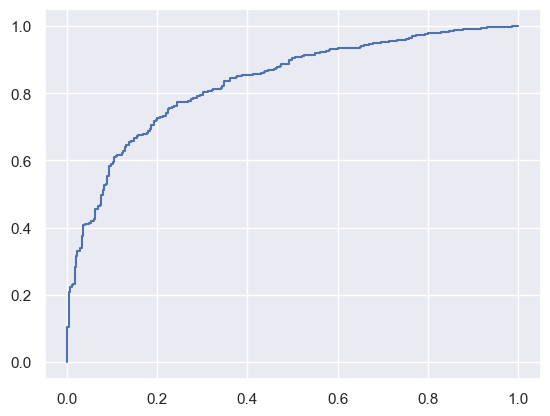

In [21]:

# ===============================Step-4:  Train the Model===================================================

from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_log=logtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

# ================================Step-7:Confusion matrix=========================================================================
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### Naive Bayes

accuray is: 75.8
F1 is: 0.81
Precision is: 0.88
Recall is: 0.75


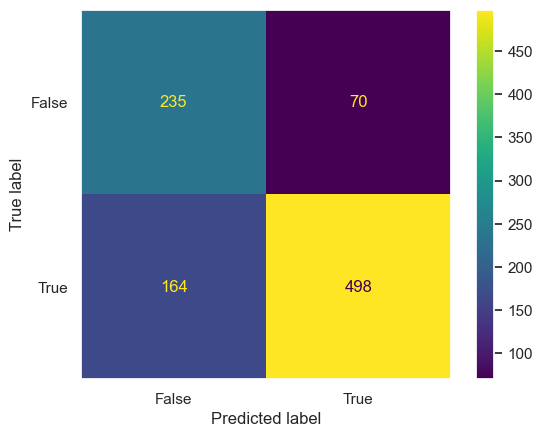

True negative: 235
False postive: 70
False negative: 164
True postive: 498


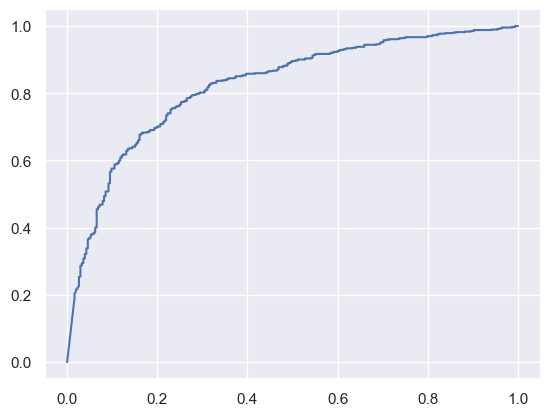

In [22]:
# ===============================Step-4:  Train the Model===================================================

from sklearn.naive_bayes import GaussianNB
NBtree=GaussianNB()
NBtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_NB=NBtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)
print("accuray is:",acc_NB)
print("F1 is:",f1_NB)
print("Precision is:",precision_NB)
print("Recall is:",recall_NB)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### KNN

accuray is: 69.08
F1 is: 0.78
Precision is: 0.75
Recall is: 0.82


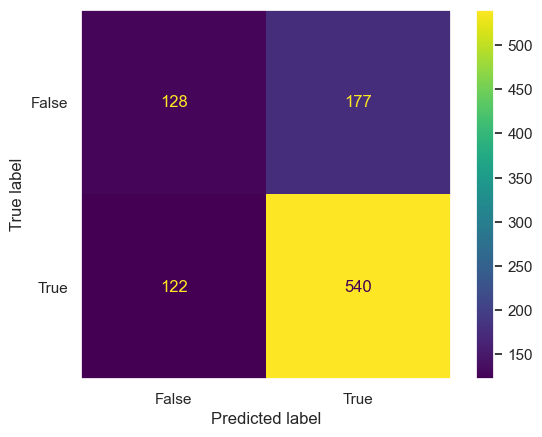

True negative: 128
False postive: 177
False negative: 122
True postive: 540


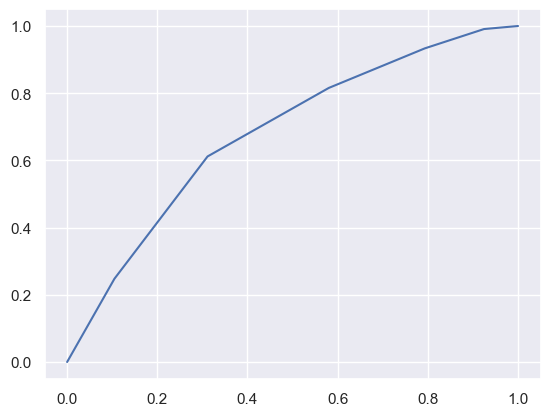

In [23]:
# ===============================Step-4:  Train the Model===================================================

from sklearn.neighbors import KNeighborsClassifier
KNNtree=KNeighborsClassifier()
KNNtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_KNN=KNNtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)
print("accuray is:",acc_KNN)
print("F1 is:",f1_KNN)
print("Precision is:",precision_KNN)
print("Recall is:",recall_KNN)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_KNN)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_KNN_pred_prob=KNNtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

### Random Forest

accuray is: 81.39
F1 is: 0.87
Precision is: 0.85
Recall is: 0.89


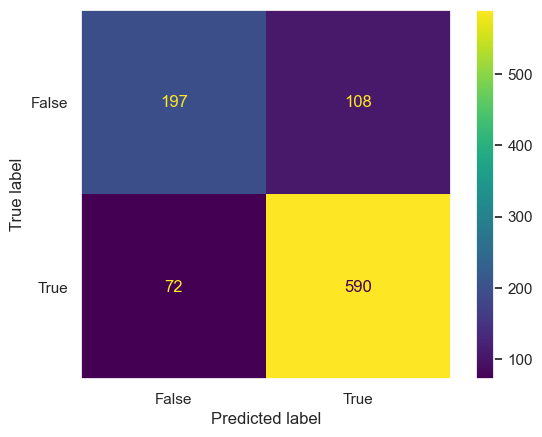

True negative: 197
False postive: 108
False negative: 72
True postive: 590


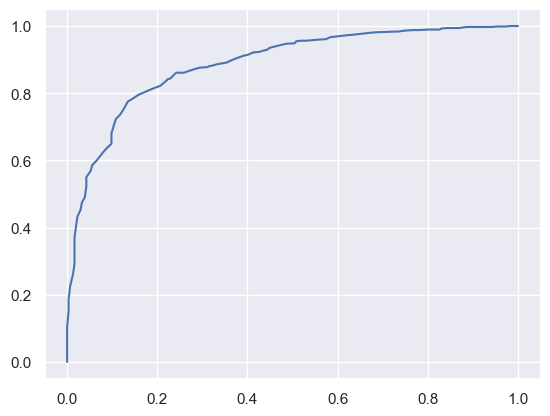

In [24]:
# ===============================Step-4:  Train the Model===================================================

from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_RF=RFtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()


In [25]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
DT,76.11,0.83,0.81,0.82
KNN,69.08,0.75,0.82,0.78
Logistic,76.84,0.81,0.86,0.84
Naive Bayes,75.80,0.88,0.75,0.81
Random Forest,81.39,0.85,0.89,0.87


## With Hyperparameter tuning

### Hyper parameter tuning

- A hyperparameter is a parameter of a model is apply before the learning process

- Different machine learning algorithms have different hyperparameters

- We will use GridserachCV

- GridSearchCV takes many hyperparameters as we like and tries every single possible combination

- It will apply Cross validation (CV)

- GridSeravhCV is a best method but time consuming

## Decision Tree

In [26]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()   # Base model
grid_tree

DecisionTreeClassifier()

In [27]:
grid_tree.get_params()

# Default parameters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [28]:
DT_params=[keys for keys in grid_tree.get_params()]
DT_params

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'monotonic_cst',
 'random_state',
 'splitter']

**max_depth**:
    
    - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less        than  min_samples_split samples.
    
**min_samples_split**:
     
      - The minimum number of samples required to split an internal node:
      
**min_samples_leaf**:
    
       - The minimum number of samples required to be at a leaf node.

In [29]:
# You need to create dictonary with hyper parameters
param_grid = {
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

In [30]:
# now these parameters to apply in a DT model
grid_search = GridSearchCV(grid_tree,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True) # cross validation
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [31]:
# train the model
grid_search.fit(X_train,y_train)

# It is searching for best fit

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [32]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=4,
                       random_state=0)

In [33]:
# Best parameters are
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'random_state': 0}

In [34]:
grid_search.best_score_

0.7866901590585801

In [35]:
# cross validayion score
cross_val_score(grid_search.best_estimator_,
                X_train,
                y_train,
                scoring='accuracy')

array([0.78409091, 0.78093883, 0.78520626, 0.79231863, 0.79089616])

In [36]:
cross_val_score(grid_search.best_estimator_,
                X_train,
                y_train,
                scoring='accuracy').mean()

0.7866901590585801

best_score_  and cross validation score both are same

In [37]:
## All together

#================================ Step-1: Get the base model===========================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()   # Base model
DT_params=[keys for keys in grid_tree.get_params()]
print("avialable parameters for model:",DT_params)

print("==========================================================================================")

#================================ Step-2: Create a dictionary for params=================================
param_grid = {
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

print("Processing parameters are:",param_grid)

print("===============================================================================================")

#============================== Step-3: Apply the Grid serach======================================
grid_search = GridSearchCV(grid_tree,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

#============================= Step-4: fit the model with train data ===============================
grid_search.fit(X_train,y_train)

#============================= Step-5: Get the best parameters=====================================
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

avialable parameters for model: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter']
Processing parameters are: {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'random_state': [0, 42]}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0}
best train accuracy: 0.7866901590585801


In [38]:
#### Now we got our best parameters
#### By using these best parameters we need to develop the model
#### get the predictions
#### get the metrics
#### get the confusion matrix
#### get the AUC-ROC curve

### Developing Decison tree with best parameters:

accuray is: 79.11
F1 is: 0.85
Precision is: 0.82
Recall is: 0.9
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       305
           1       0.82      0.90      0.85       662

    accuracy                           0.79       967
   macro avg       0.77      0.73      0.74       967
weighted avg       0.78      0.79      0.78       967



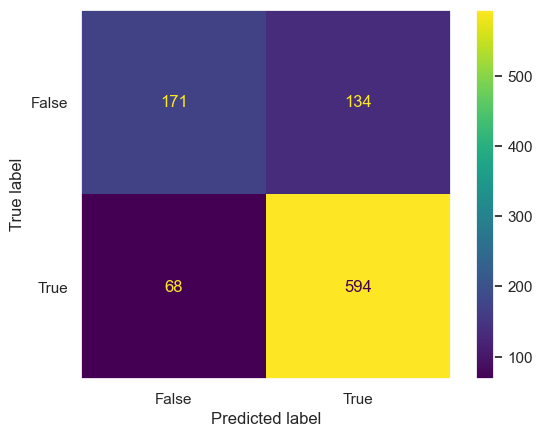

True negative: 171
False postive: 134
False negative: 68
True postive: 594


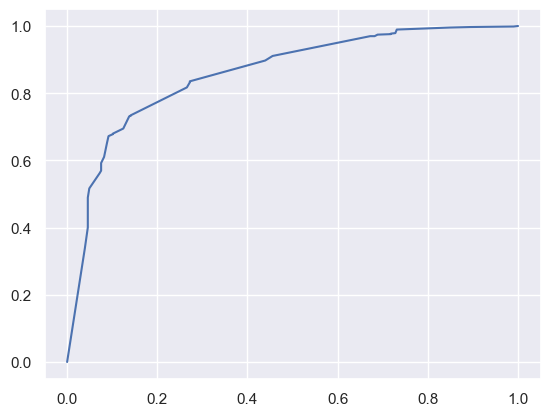

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',
                            max_depth=6,
                            min_samples_leaf=4,
                            min_samples_split=2,
                            random_state=0)
dtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_dt=dtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

# ================================Step-7:Confusion matrix=========================================================================

cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

### Important features

In [40]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

# automatic way to provide feature importance 
# is avialble inly in DT : Information gain

,Feature Name,Importance
22,Contract,0.464365
7,Number of Referrals,0.180554
2,Age,0.107109
29,Total Long Distance Charges,0.053617
25,Monthly Charge,0.052450
4,Number of Dependents,0.038158
12,Internet Type,0.036871
3,Married,0.016897
30,Total Revenue,0.016363
26,Total Charges,0.008237


In [41]:
# Step-1: EDA
# Step-2: Devlope a model
# Step-3: calculate metrics
# step-4: do the hyper parameter tuning
# step-5: Get the best params
# step-6: Develop the model with best params
# step-7: calculate mterics

#### Random forest: Hyper parameter tuning

In [42]:
## All together

#================================ Step-1: Get the base model===========================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_RF=RandomForestClassifier()   # Base model
RF_params=[keys for keys in grid_RF.get_params()]
print("avialable parameters for model:",RF_params)

print("==========================================================================================")

#================================ Step-2: Create a dictionary for params=================================
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

print("Processing parameters are:",param_grid)

print("===============================================================================================")

#============================== Step-3: Apply the Grid serach======================================
grid_search = GridSearchCV(grid_RF,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

#============================= Step-4: fit the model with train data ===============================
grid_search.fit(X_train,y_train)

#============================= Step-5: Get the best parameters=====================================
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

avialable parameters for model: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
Processing parameters are: {'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10], 'max_features': ['sqrt', 'log2', None], 'random_state': [0, 42]}
Fitting 5 folds for each of 72 candidates, totalling 360 fits
best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'n_estimators': 200, 'random_state': 0}
best train accuracy: 0.8202484482089745


### Developing Random forest with best parameters:

accuray is: 83.14
F1 is: 0.88
Precision is: 0.86
Recall is: 0.9


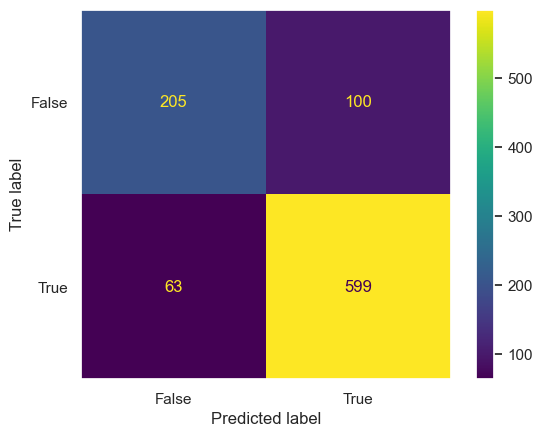

True negative: 205
False postive: 100
False negative: 63
True postive: 599


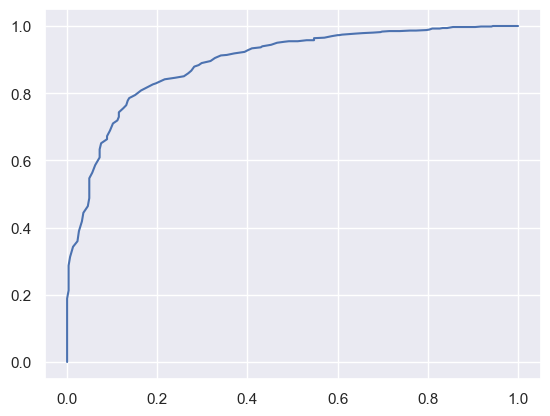

In [43]:
# ===============================Step-4:  Train the Model===================================================

from sklearn.ensemble import RandomForestClassifier
RFtree=RandomForestClassifier()
RFtree.fit(X_train, y_train)

# =============================Step-5:  Predictions============================================================

y_pred_RF=RFtree.predict(X_test)

# ============================ Step-6: Metrics==================================================================

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)

# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()


### KNN- with hypear parameter tuning

In [44]:
## All together

#================================ Step-1: Get the base model===========================================
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_KNN=KNeighborsClassifier()   # Base model
KNN_params=[keys for keys in grid_KNN.get_params()]
print("avialable parameters for model:",KNN_params)

print("==========================================================================================")

#================================ Step-2: Create a dictionary for params=================================
param_grid = {
              "n_neighbors":[5,6,7,10],
              "leaf_size":[20,30,40,50],
              "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']

}

print("Processing parameters are:",param_grid)

print("===============================================================================================")

#============================== Step-3: Apply the Grid serach======================================
grid_search = GridSearchCV(grid_KNN,  # Base modl
                           param_grid, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)

#============================= Step-4: fit the model with train data ===============================
grid_search.fit(X_train,y_train)

#============================= Step-5: Get the best parameters=====================================
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print("best params:",best_params)
print("best train accuracy:",best_score)

avialable parameters for model: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
Processing parameters are: {'n_neighbors': [5, 6, 7, 10], 'leaf_size': [20, 30, 40, 50], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
Fitting 5 folds for each of 64 candidates, totalling 320 fits
best params: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7}
best train accuracy: 0.6780441775507565
